In [10]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [12]:
dset_str = 'train'
dir_data = os.path.expanduser('~/scratch')
dir_dataset = os.path.join(dir_data, 'files_small')
toy_train_pa = torch.load(os.path.join(dir_dataset, 'toy_train_pa.pt')).numpy()
toy_train_lat = torch.load(os.path.join(dir_dataset, 'toy_train_lat.pt')).numpy()

(70, 128, 128)


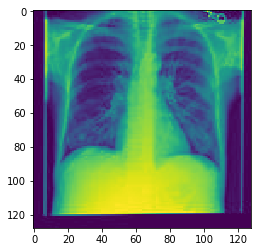

In [11]:
print(toy_train_pa.shape)
plt.imshow(toy_train_pa[0])
plt.show()

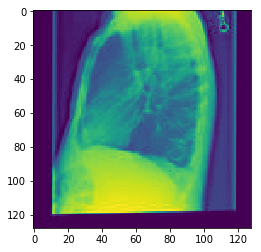

In [13]:
plt.imshow(toy_train_lat[0])
plt.show()


In [15]:
str_labels = ['Lung Opacity', 'Pleural Effusion', 'Support Devices']

toy_train_labels = pd.read_csv(os.path.join(dir_dataset, 'toy_train_labels.csv'))[str_labels].fillna(0)
toy_train_labels.head()

,Lung Opacity,Pleural Effusion,Support Devices
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [20]:
toy_train_findings = pd.read_csv(os.path.join(dir_dataset, 'toy_train_findings.csv'))['findings'].values
print(toy_train_findings)

['There is no focal consolidation, pleural effusion or pneumothorax.  Bilateral nodular opacities that most likely represent nipple shadows. The cardiomediastinal silhouette is normal.  Clips project over the left lung, potentially within the breast. The imaged upper abdomen is unremarkable. Chronic deformity of the posterior left sixth and seventh ribs are noted.'
 'The cardiac, mediastinal and hilar contours are normal. Pulmonary vasculature is normal.  Lungs are clear. No pleural effusion or pneumothorax is present. Multiple clips are again seen projecting over the left breast.  Remote left-sided rib fractures are also re- demonstrated.'
 'As compared to the prior examination dated ___, there has been no significant interval change. There is no evidence of focal consolidation, pleural effusion, pneumothorax, or frank pulmonary edema.  The cardiomediastinal silhouette is within normal limits.  There is persistent thoracic kyphosis with mild wedging of a mid thoracic vertebral body.'
